In [6]:
# we import the genral purpose modules/libraries that we'll need
import pandas as pd
import numpy as np
# we import the plotting libraries that we'll need
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data, Diagnostics, and Data Cleaning

For this tutorial, we're going to use the "Correlates of State Policy Project" dataset, from the IPPSR of Michigan State University, which can be accessed at the following [link](https://ippsr.msu.edu/public-policy/correlates-state-policy).


In order to import our data, we're going to use the `pandas` library, which we've imported above. In particular, we're going to use the function `read_csv()`, as our sample dataset is in csv format. There are analogous functions for other kinds of formats, such as `read_excel` for Excel file types, such as `xls`, and `xlsx`.

In [2]:
# How to import our data
# For pedagogical purposes, we'll write explicitly the key parameters we're going to need 
df = pd.read_csv(filepath_or_buffer= "msu_dataset.csv", 
                 sep = ",",
                 index_col= 0,
                 parse_dates= True,
                 float_precision= "round_trip")

In [3]:
# This simple command allows us to display the first 5 (or more) rows of our dataframe
# It's always good to preliminarily have a quick look to make sure the import was successful
df.head()

,st,stateno,state,state_fips,state_icpsr,poptotal,evangelical_pop,nonwhite,gini_coef,region,...,solaw,vaaban,w_environment_solar_taxcredit,frps,drugs_medical_marijuana,gambling_lottery_adoption,guncontrol_assaultweapon_ban,guncontrol_opencarry,labor_minwage_abovefed,labor_right_to_work
year,,,,,,,,,,,,,,,,,,,,,
1900-01-01,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901-01-01,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-01-01,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903-01-01,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904-01-01,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# The following command allows us to have a look at the shape of our dataset
# In this case, as the table is 2-dimensional, it'll only display rows and columns
# In other cases, it will show the additional dimensions, for more complex data structures

df.shape

(6171, 71)

Here above we can see that our dataset has 6171 observations/rows, and 71 columns. 

In [6]:
# This is a quick command to check the NaN observations
df.isna()

,st,stateno,state,state_fips,state_icpsr,poptotal,evangelical_pop,nonwhite,gini_coef,region,...,solaw,vaaban,w_environment_solar_taxcredit,frps,drugs_medical_marijuana,gambling_lottery_adoption,guncontrol_assaultweapon_ban,guncontrol_opencarry,labor_minwage_abovefed,labor_right_to_work
year,,,,,,,,,,,,,,,,,,,,,
1900-01-01,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1901-01-01,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1902-01-01,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1903-01-01,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1904-01-01,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01,False,False,False,False,False,False,True,True,True,False,...,True,False,True,False,True,True,True,True,True,True
2017-01-01,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2018-01-01,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [13]:
# To summarize the number of NaN values of each column, we can use the following command
df.isna().sum()

st                                 0
stateno                            0
state                              0
state_fips                         0
state_icpsr                        0
                                ... 
gambling_lottery_adoption       3570
guncontrol_assaultweapon_ban    4845
guncontrol_opencarry            3417
labor_minwage_abovefed          3921
labor_right_to_work             2550
Length: 71, dtype: int64

In [14]:
# To look more in detail at the number of NaN values that a specific column has, first we may want to have
# a look at the names of all the columns

df.columns

Index(['st', 'stateno', 'state', 'state_fips', 'state_icpsr', 'poptotal',
       'evangelical_pop', 'nonwhite', 'gini_coef', 'region',
       'total_expenditure', 'total_revenue', 'gsppcap', 'incomepcap',
       'unemployment', 'povrate', 'earned_income_taxcredit', 'x_sales_taxes',
       'x_tax_burden', 'x_top_corporateincometaxrate', 'prez_election_year',
       'hou_chamber', 'sen_chamber', 'h_diffs', 's_diffs', 'inst6014_nom',
       'bowen_legprof_firstdim', 'bowen_legprof_seconddim', 'speaker_power',
       'pctfemaleleg', 'efna_index', 'vepvotingrate', 'ranney4_control',
       'overall_fin_reg', 'oelecsc', 'opartsc', 'nonindiv_contrib',
       'union_density', 'pollib_median', 'innovatescore_boehmkeskinner',
       'soc_capital_ma', 'citi6013', 'wpid', 'mood', 'anti_environment',
       'anti_aid', 'anti_defense', 'anti_education', 'anti_welfare',
       'anti_race', 'death_penalty', 'guncontrol_stand_your_ground',
       'vcrimerate', 'z_education_expenditures_per_pup', 'maths

In [16]:
# to get more detailed diagnostics, we can perform the following
# example with guncontrol_assaultweappon_ban
# by inserting the string inside square brackets, we index, so we focus on a specific column
# and then we can perform manipulations on it

df["guncontrol_assaultweapon_ban"].isna().sum()

4845

In [27]:
# if you want to drop all the rows containing a NaN value, you can perform the following
# axis=0 indicates that we're working with respect to rows

# the threshold parameter allows you to set a minimum number of non-NaN values needed not to drop  
df_dna_row = df.dropna(axis = 0, thresh= 100)
# with this we check the shape of the resulting table
df_dna_row.shape

(0, 71)

Here we can see that, as all rows have at least a NaN value, by dropping all such rows, we get a table with 0 rows, essentially.

In [ ]:
# now, let's do the same with respect to columns
# to do so, we must set axis=1

# the how parameter with "any" drops a column if any NaN/NA values are present
# the how parameter with "all" drops a column if any NaN/NA values are present
df_dna_col = df.dropna(axis = 1, how="any")
df_dna_col.shape

(6171, 5)

Here we can see that all but 5 columns have at least a NaN value, and therefore they've been dropped.
Let's have a look at what these columns are.

The `isnull()` command is the same, but for the case of `None` values instead of `NaN` values.

A way to manage missing values is to use the function `fillna()`. 

In [30]:
# A basic, but not always optimal solution, may be to assign the value 0 to all missing values
# Reminder: we use head to only display the first 5 rows
df.fillna(value = 0).head()

,st,stateno,state,state_fips,state_icpsr,poptotal,evangelical_pop,nonwhite,gini_coef,region,...,solaw,vaaban,w_environment_solar_taxcredit,frps,drugs_medical_marijuana,gambling_lottery_adoption,guncontrol_assaultweapon_ban,guncontrol_opencarry,labor_minwage_abovefed,labor_right_to_work
year,,,,,,,,,,,,,,,,,,,,,
1900-01-01,AK,2.0,Alaska,2,81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-01,AK,2.0,Alaska,2,81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902-01-01,AK,2.0,Alaska,2,81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903-01-01,AK,2.0,Alaska,2,81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904-01-01,AK,2.0,Alaska,2,81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# We can fill the holes in our reindexed Series by using "ffil" or "bfill"
# "ffil" propagates the last valid observation forward to the next vali
# "bfill" propagates the next valid observation to fill the gaps

df.fillna(method = "bfill").head()

,st,stateno,state,state_fips,state_icpsr,poptotal,evangelical_pop,nonwhite,gini_coef,region,...,solaw,vaaban,w_environment_solar_taxcredit,frps,drugs_medical_marijuana,gambling_lottery_adoption,guncontrol_assaultweapon_ban,guncontrol_opencarry,labor_minwage_abovefed,labor_right_to_work
year,,,,,,,,,,,,,,,,,,,,,
1900-01-01,AK,2.0,Alaska,2,81,135000.0,11.9,0.205493,0.443897,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1901-01-01,AK,2.0,Alaska,2,81,135000.0,11.9,0.205493,0.443897,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1902-01-01,AK,2.0,Alaska,2,81,135000.0,11.9,0.205493,0.443897,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1903-01-01,AK,2.0,Alaska,2,81,135000.0,11.9,0.205493,0.443897,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1904-01-01,AK,2.0,Alaska,2,81,135000.0,11.9,0.205493,0.443897,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
df.fillna(method = "ffill").head()

,st,stateno,state,state_fips,state_icpsr,poptotal,evangelical_pop,nonwhite,gini_coef,region,...,solaw,vaaban,w_environment_solar_taxcredit,frps,drugs_medical_marijuana,gambling_lottery_adoption,guncontrol_assaultweapon_ban,guncontrol_opencarry,labor_minwage_abovefed,labor_right_to_work
year,,,,,,,,,,,,,,,,,,,,,
1900-01-01,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901-01-01,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-01-01,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903-01-01,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904-01-01,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Alternatively, we may use more a slightly more sophisticated method where we use a dictionary to choose for each column we're interested a particular fill value.

In [41]:
values = {"poptotal":10, "evangelical_pop": 5}

df.fillna(value = values).head()

,st,stateno,state,state_fips,state_icpsr,poptotal,evangelical_pop,nonwhite,gini_coef,region,...,solaw,vaaban,w_environment_solar_taxcredit,frps,drugs_medical_marijuana,gambling_lottery_adoption,guncontrol_assaultweapon_ban,guncontrol_opencarry,labor_minwage_abovefed,labor_right_to_work
year,,,,,,,,,,,,,,,,,,,,,
1900-01-01,AK,2.0,Alaska,2,81,10.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901-01-01,AK,2.0,Alaska,2,81,10.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-01-01,AK,2.0,Alaska,2,81,10.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903-01-01,AK,2.0,Alaska,2,81,10.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904-01-01,AK,2.0,Alaska,2,81,10.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If we want to check if a row has a duplicated, then, we can use the `duplicated` method, which will return us a "boolean mask" indicating duplicate rows. In order words, it returns "True" if a row has a duplicate, and "False" otherwise.

In [42]:
df.duplicated()

year
1900-01-01    False
1901-01-01     True
1902-01-01     True
1903-01-01     True
1904-01-01     True
              ...  
2016-01-01    False
2017-01-01    False
2018-01-01    False
2019-01-01    False
2020-01-01    False
Length: 6171, dtype: bool

In [48]:
# in order to eliminate the duplicated rows, we can use the following function "drop_duplicates()"

df_dd = df.drop_duplicates(keep = "first", subset = df.columns)
(df.shape, df_dd.shape)

((6171, 71), (6090, 71))

In [47]:
print(f"We can see that the original dataset had {df.shape[0]-df_dd.shape[0]} duplicated rows")

We can see that the original dataset had 81 duplicated rows


Sometimes the `read_csv()` may fail to recognize the data type of a certain column. In such case, we may want to perform a manual conversion.

In [54]:
# An example of conversion to the type "int", which corresponds to natural numbers is the following
# tail is the analogous of .head(), but it displays the final 5 rows
df["poptotal"].tail()

year
2016-01-01    585501.0
2017-01-01    579315.0
2018-01-01    577601.0
2019-01-01    578759.0
2020-01-01         NaN
Name: poptotal, dtype: float64

We can see that in our case `poptotal` has the float64 datat type, which corresponds to decimal numbers. 
Let's try to convert it to a string format.

In [61]:
df["poptotal"].astype(str)

year
1900-01-01         nan
1901-01-01         nan
1902-01-01         nan
1903-01-01         nan
1904-01-01         nan
                ...   
2016-01-01    585501.0
2017-01-01    579315.0
2018-01-01    577601.0
2019-01-01    578759.0
2020-01-01         nan
Name: poptotal, Length: 6171, dtype: object

In [66]:
# This is how we can refer to the index of our dataframe
df.index

DatetimeIndex(['1900-01-01', '1901-01-01', '1902-01-01', '1903-01-01',
               '1904-01-01', '1905-01-01', '1906-01-01', '1907-01-01',
               '1908-01-01', '1909-01-01',
               ...
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='year', length=6171, freq=None)

In [72]:
# To reformat our index to hold show the corresponding year, we can use the strftime command
df.index = df.index.strftime("%Y")

In [73]:
df.index

Index(['1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908',
       '1909',
       ...
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object', name='year', length=6171)

We can use indexing to conditionally select only the rows which fulfill a particular condition in the following way

In [79]:
# First we need to reconvert "poptotal" to a numerical format
df["poptotal"] = df["poptotal"].astype(float)

# In the following way we can isolate only the rows where "poptotal" is greater than 500k
df[df["poptotal"]> 500000]

,st,stateno,state,state_fips,state_icpsr,poptotal,evangelical_pop,nonwhite,gini_coef,region,...,solaw,vaaban,w_environment_solar_taxcredit,frps,drugs_medical_marijuana,gambling_lottery_adoption,guncontrol_assaultweapon_ban,guncontrol_opencarry,labor_minwage_abovefed,labor_right_to_work
year,,,,,,,,,,,,,,,,,,,,,
1984,AK,2.0,Alaska,2,81,513702.0,11.900000,0.235833,0.502557,2.0,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,1.0,0.0
1985,AK,2.0,Alaska,2,81,532495.0,16.799999,0.236023,0.504690,2.0,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,1.0,0.0
1986,AK,2.0,Alaska,2,81,544268.0,16.799999,0.239796,0.573903,2.0,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,1.0,0.0
1987,AK,2.0,Alaska,2,81,539309.0,16.799999,0.245473,0.644675,2.0,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,1.0,0.0
1988,AK,2.0,Alaska,2,81,541983.0,16.799999,0.252325,0.695108,2.0,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,WY,50.0,Wyoming,56,68,586107.0,NaN,NaN,NaN,2.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2016,WY,50.0,Wyoming,56,68,585501.0,NaN,NaN,NaN,2.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017,WY,50.0,Wyoming,56,68,579315.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# To conditionally index columns under multiple conditions, we can perform the following
# We put in curly brackets each condition and use the operators & for "and" and | for "or"

df[(df["state"] == "Alaska")&(df["poptotal"]>532495)].head()

,st,stateno,state,state_fips,state_icpsr,poptotal,evangelical_pop,nonwhite,gini_coef,region,...,solaw,vaaban,w_environment_solar_taxcredit,frps,drugs_medical_marijuana,gambling_lottery_adoption,guncontrol_assaultweapon_ban,guncontrol_opencarry,labor_minwage_abovefed,labor_right_to_work
year,,,,,,,,,,,,,,,,,,,,,
1986,AK,2.0,Alaska,2,81,544268.0,16.799999,0.239796,0.573903,2.0,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,1.0,0.0
1987,AK,2.0,Alaska,2,81,539309.0,16.799999,0.245473,0.644675,2.0,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,1.0,0.0
1988,AK,2.0,Alaska,2,81,541983.0,16.799999,0.252325,0.695108,2.0,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,1.0,0.0
1989,AK,2.0,Alaska,2,81,547159.0,16.799999,0.257314,0.667497,2.0,...,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0
1990,AK,2.0,Alaska,2,81,550043.0,16.799999,0.259947,0.670734,2.0,...,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0


### Basic Statistics and Plotting

Here below, we import two useful libraries that we'll need for plotting our dataset, as well as descriptive statistics related to it.

Let's print basic information about our dataset. 

Again, the `shape` property returns us information about the dimensionality (or shape) of our dataset. 

The `info`, instead, provides basic information about the data type and number of entries in each column of our dataset. Furthermore, it also provides us information about the memory usage of our dataset, which may turn out to be helpful when we need to be more careful about memory usage and performance.  

In [ ]:
# We show again the shape property of a dataframe
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (6171, 71)


In [16]:
# We show the info method
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6171 entries, 1900-01-01 to 2020-01-01
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   st                                6171 non-null   object 
 1   stateno                           6171 non-null   float64
 2   state                             6171 non-null   object 
 3   state_fips                        6171 non-null   int64  
 4   state_icpsr                       6171 non-null   int64  
 5   poptotal                          6020 non-null   float64
 6   evangelical_pop                   1950 non-null   float64
 7   nonwhite                          1900 non-null   float64
 8   gini_coef                         4863 non-null   float64
 9   region                            4488 non-null   float64
 10  total_expenditure                 3689 non-null   float64
 11  total_revenue                     3689 non-null   f

Now, we show how to compute basic statistics for each numerical variable: mean, standard deviation, minimum, maximum and quartiles.

Such information can be easily retrieved by using the `describe` method that all dataframes have.

We can still use indexing and the other techniques shown before to focus our attention on a particular subset of columns.

In [55]:
display(df.describe())

,stateno,state_fips,state_icpsr,poptotal,evangelical_pop,nonwhite,gini_coef,region,total_expenditure,total_revenue,...,solaw,vaaban,w_environment_solar_taxcredit,frps,drugs_medical_marijuana,gambling_lottery_adoption,guncontrol_assaultweapon_ban,guncontrol_opencarry,labor_minwage_abovefed,labor_right_to_work
count,6171.000000,6171.000000,6171.000000,6.020000e+03,1950.000000,1900.000000,4863.000000,4488.000000,3.689000e+03,3.689000e+03,...,2700.000000,850.000000,2000.000000,850.000000,969.000000,2601.000000,1326.000000,2754.000000,2250.000000,3621.000000
mean,25.166667,28.960784,40.882353,3.726152e+06,18.926974,0.197016,0.483842,2.254902,1.296286e+07,1.366044e+07,...,0.123333,0.162353,0.835500,3.569036,0.199174,0.510957,0.116893,0.366376,0.164000,0.357912
std,14.482963,15.678106,22.360428,4.556331e+06,14.347177,0.141929,0.078357,1.099911,2.777233e+07,2.937421e+07,...,0.328880,0.501582,0.939085,6.671617,0.399586,0.499976,0.321414,0.481901,0.370358,0.479452
min,1.000000,1.000000,1.000000,4.300000e+04,1.100000,0.004808,0.231430,1.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,16.000000,23.000000,9.014828e+05,10.200000,0.087567,0.427731,1.000000,5.923990e+05,6.100120e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,29.000000,43.000000,2.359000e+06,14.600000,0.165685,0.469952,2.000000,3.423299e+06,3.665280e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,42.000000,61.000000,4.537724e+06,26.000000,0.282846,0.549318,3.000000,1.330778e+07,1.431787e+07,...,0.000000,0.000000,2.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,50.000000,56.000000,82.000000,3.953665e+07,74.000000,0.768056,0.747416,4.000000,3.750944e+08,4.123977e+08,...,1.000000,2.000000,2.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
display(df["poptotal"].describe())

count    6.020000e+03
mean     3.726152e+06
std      4.556331e+06
min      4.300000e+04
25%      9.014828e+05
50%      2.359000e+06
75%      4.537724e+06
max      3.953665e+07
Name: poptotal, dtype: float64

In the following section, we restrict our attention to more particular cases, rather than to the general dataset. In particular, in the following we're going to avail ourselves of the plotting libraries/modules we've previously imported.

In [8]:
# We plot basic descriptive statistics (i.e. histograms) for the first k numerical variables

# It's a good practice to write generalized code
# Here, we define a variable k, so that we can easily modify the number of variables we consider
# if we need it

k=5

# Here we select the first k columns which include numerical data
# To do so, we use the select_dtypes method, and np.number to indicate that we want numerical data
numerical_columns = df.select_dtypes(include=[np.number]).columns[:k]


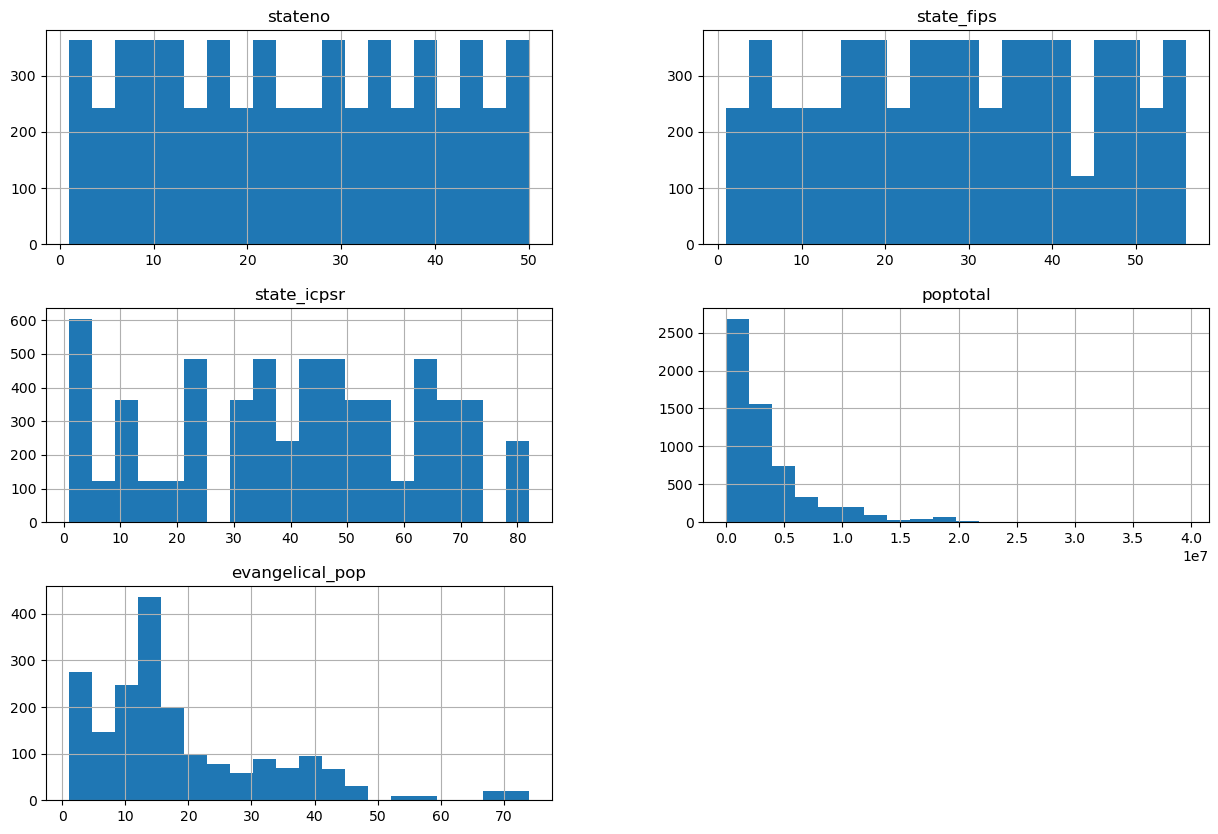

In [22]:
# Now, we actually plot our histogram
# The arguments are self-descriptive: bins is the number of bins, while figsize is the size in inches

# We include the ";" at the end to prevent the printing of some underlying parameters of the plot

df[numerical_columns].hist(bins=20,figsize=(15, 10));

Now, we do something analogous, but in this case we opt fo a boxplot, so that we can visualize the median, and the interquartile range.

In order to perform the following, we'll have to opt for slightly more advanced techniques, such as using for loops or the `enumerate` function. Such function will allow us to iterate through our numerical columns with their indices, essentially. Indeed, it "enumerates" the inputs. 

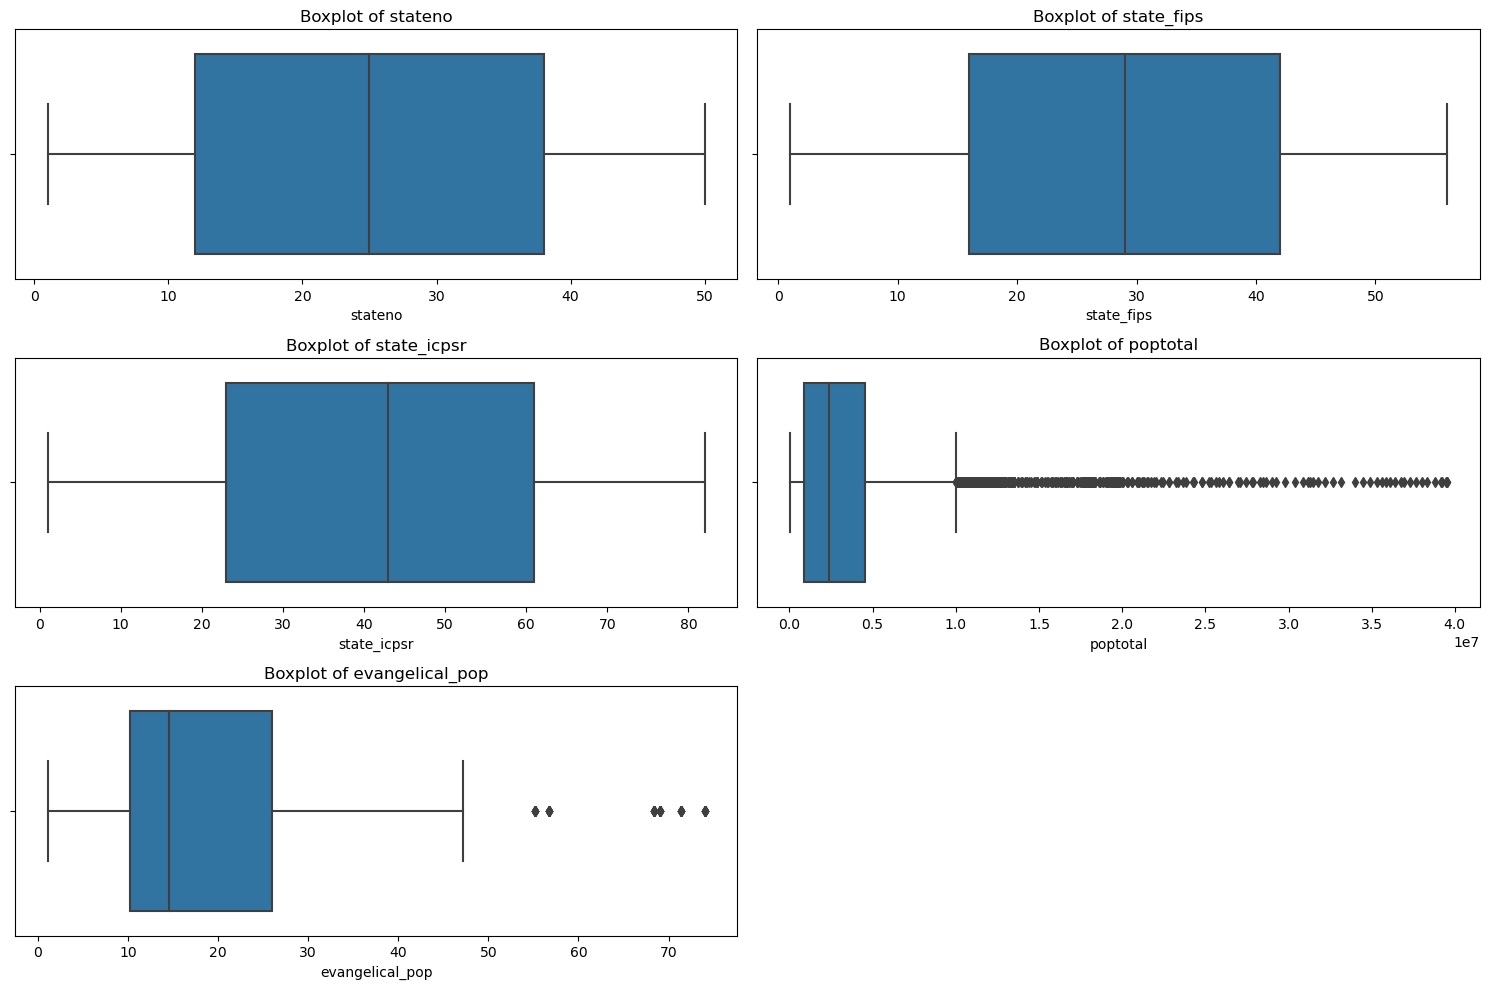

In [9]:
# We create again a new figure with the following size: width=15, height=10 inches
plt.figure(figsize=(15, 10)) 

for idx, col in enumerate(numerical_columns): 
    # Iterates through the numerical columns with their indices
    # Creates a subplot in a grid
    # (len(numerical_columns)+1)//2 calculates the number of rows, ensuring all plots fit
    # 2 specifies 2 columns in the grid
    # idx+1 specifies the position of the current subplot (note: the function uses a 1-based index)
    plt.subplot((len(numerical_columns)+1)//2, 2, idx+1)

    sns.boxplot(x=df[col]) # Creates a boxplot for the current column using seaborn
    plt.title(f"Boxplot of {col}") # Sets the title of the subplot with the column name

plt.tight_layout() # Adjust subplot parameters to prevent overlapping titles and labels

plt.show() # Displays the generated figure with all the boxplots

Now, we plot the correlation matrix for the columns of our dataset. We first do it at a basic level, using the `pandas` library, and then we show how to make it look prettier using `seaborn`.

In [10]:
corr_matrix = df[numerical_columns].corr()

corr_matrix

,stateno,state_fips,state_icpsr,poptotal,evangelical_pop
stateno,1.000000,0.998953,-0.039604,-0.032485,0.022432
state_fips,0.998953,1.000000,-0.044877,-0.037272,0.016778
state_icpsr,-0.039604,-0.044877,1.000000,-0.112903,0.428050
poptotal,-0.032485,-0.037272,-0.112903,1.000000,-0.103555
evangelical_pop,0.022432,0.016778,0.428050,-0.103555,1.000000


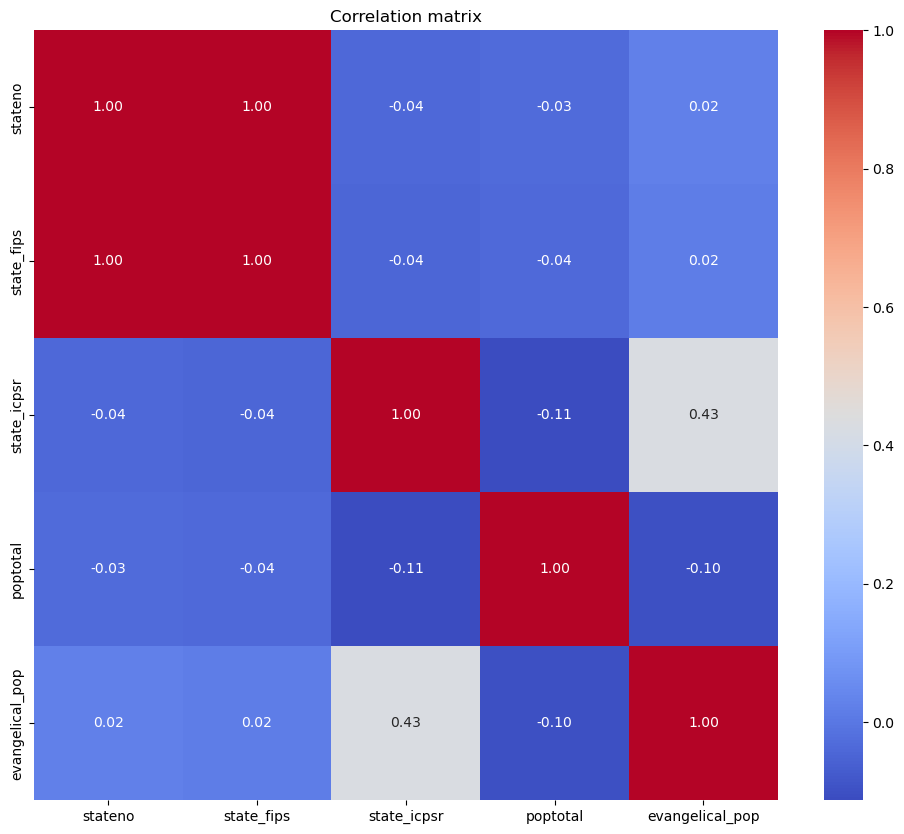

In [11]:
plt.figure(figsize=(12, 10))

# We make things prettier using seaborn's heatmap function
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Correlation matrix")
plt.show()

Having calculated the correlation matrix, we may be interested in identifying the variables which are significantly correlated.

In [16]:
threshold = 0.7  # threshold for an elevated correlation (may be changed depending on the circumstances)


# Calculate the correlation matrix and unstack it into a Series, then sort by correlation values (descending)
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# We show what the unstakced correlation matrix looks like
corr_pairs

stateno          stateno            1.000000
state_fips       state_fips         1.000000
poptotal         poptotal           1.000000
state_icpsr      state_icpsr        1.000000
evangelical_pop  evangelical_pop    1.000000
stateno          state_fips         0.998953
state_fips       stateno            0.998953
evangelical_pop  state_icpsr        0.428050
state_icpsr      evangelical_pop    0.428050
evangelical_pop  stateno            0.022432
stateno          evangelical_pop    0.022432
state_fips       evangelical_pop    0.016778
evangelical_pop  state_fips         0.016778
poptotal         stateno           -0.032485
stateno          poptotal          -0.032485
state_fips       poptotal          -0.037272
poptotal         state_fips        -0.037272
state_icpsr      stateno           -0.039604
stateno          state_icpsr       -0.039604
state_icpsr      state_fips        -0.044877
state_fips       state_icpsr       -0.044877
poptotal         evangelical_pop   -0.103555
evangelica

In [17]:
# Remove duplicates and autocorrelation (correlation of a variable with itself, which is always 1)

# Filter the Series to keep only correlations that are:
#   - Less than 1 (to exclude autocorrelation)
#   - Greater than the specified threshold (to select highly correlated pairs)
corr_pairs = corr_pairs[(corr_pairs < 1) & (corr_pairs > threshold)]

In [18]:
print("\nCouples of variables with correlation greater than", threshold, ":") 
print(corr_pairs) 


Couples of variables with correlation greater than 0.7 :
stateno     state_fips    0.998953
state_fips  stateno       0.998953
dtype: float64


#### Appendix: more "advanced" method to return high correlations

We briefly show as an appendix a more advanced approach to remove duplicates in results, as correlation is commutative, and, for instance, above, we had the same result swice.

In [19]:
# Get the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the upper triangle, sort by correlation values (descending), and remove NaNs
corr_pairs = upper_triangle.unstack().sort_values(ascending=False).dropna()

# Filter the Series to keep only correlations that are:
#   - Greater than the specified threshold (highly correlated pairs)
corr_pairs = corr_pairs[corr_pairs > threshold]

`np.triu` is a function that extracts or creates an upper triangle matrix from a given array. We can use it because the correlation matrix is always a square matrix.

The `where()` method in Pandas is used to conditionally replace values in our dataframe. It acts as a filter, and allows to selectively keep or replace elements based on a condition.

Below we can see that now the annoying issue has been fixed.


In [21]:
print("\nCouples of variables with correlation greater than", threshold, ":")
print(corr_pairs)


Couples of variables with correlation greater than 0.7 :
state_fips  stateno    0.998953
dtype: float64


To better show the nature of the correlation, we plot it using a scatter-plot.

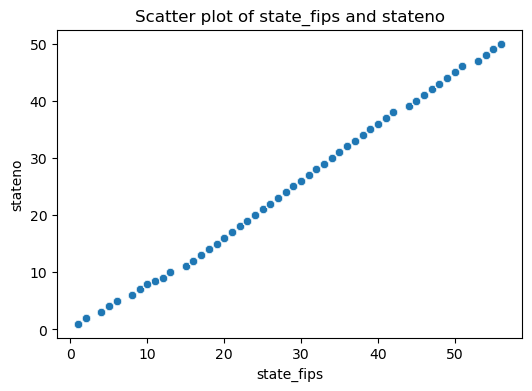

In [24]:
# Scatter plot for highly correlated variables
if not corr_pairs.empty: # Check if the 'corr_pairs' Series is not empty (i.e., if there are highly correlated pairs)
    pairs = corr_pairs.index.tolist() # Extract the first two highly correlated pairs from the index of 'corr_pairs'
                                        # .index gets the index (which contains the variable pairs)
                                        # .tolist() converts it to a list
                                        # [:2] takes the first two elements of the list

    for (var1, var2) in pairs: # Iterate through the first two highly correlated pairs
        plt.figure(figsize=(6,4))
        
        sns.scatterplot(data=df, x=var1, y=var2) # Create a scatter plot using seaborn

        plt.title(f"Scatter plot of {var1} and {var2}") 
        plt.xlabel(var1) 
        plt.ylabel(var2) 
        plt.show() 

### DiD and Regression